In [2]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

#sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp * num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [3]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )


     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


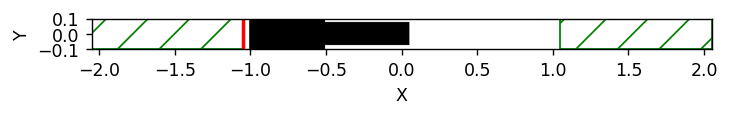

In [4]:

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

In [5]:

t_xx = (.532)
dt = (t_xx / 40)
t = 750

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy + gp/2
y_obs = y_obs_start
print(int((t_xx)/dt))

40


-----------
Initializing structure...
time for choose_chunkdivision = 0.000174046 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.2 x 0 with resolution 500
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.163079 s
-----------
Meep progress: 5.037/750.0 = 0.7% done in 4.0s, 591.6s to go
on time step 5037 (time=5.037), 0.000794213 s/step
Meep progress: 10.36/750.0 = 1.4% done in 8.0s, 571.2s to go
on time step 10361 (time=10.361), 0.000751421 s/step
Meep progress: 15.893/750.0 = 2.1% done in 12.0s, 554.3s to go
on time step 15896 (time=15.896), 0.000722766 s/step
Meep progress: 21.415/750.0 = 2.9% done in 16.0s, 544.4s to go
on time step 21418 (

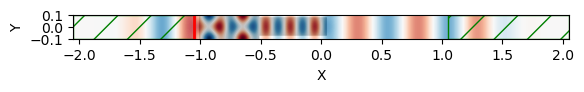

In [6]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [7]:
ez_data_list = np.array(ez_data_list)
ez_amplitude = np.abs(ez_data_list)
print(len(ez_amplitude))
print(max(ez_amplitude))
print(ez_amplitude[20000])
print(1 + int(round(t_xx/dt)))

57692
0.15768864032165167
0.12502412325340634
41


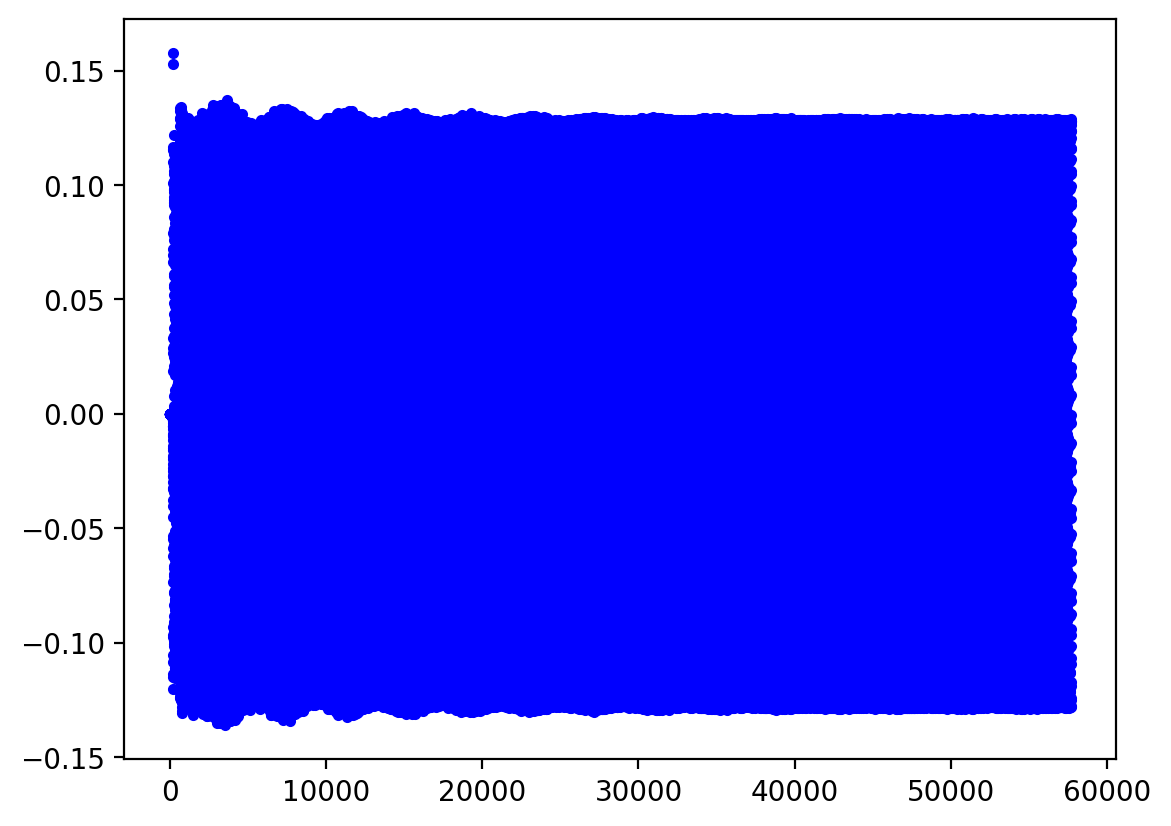

In [8]:
plt.figure(dpi = 200)
for i in range( round(len(ez_amplitude) * 0 / t) , round(len(ez_amplitude) * t / t)):
    plt.plot(i , ez_data_list[i] , 'b.')

In [9]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
57610


0.1325064283107711 --------one period 內最大振福
0.13250638803413434 -------one next_period 內最大振福
4.0276636775749e-08 -----振幅誤差
(array([68326]),) --- index1
(array([68365]),) --- index2
0.1325064283107711 	 0.13250638803413434 	 4.0276636775749e-08 	 (array([68326]),) 	 (array([68365]),) 


到達誤差範圍內的所需 meep time unit 444.1194441194441 

0.13261745014030607


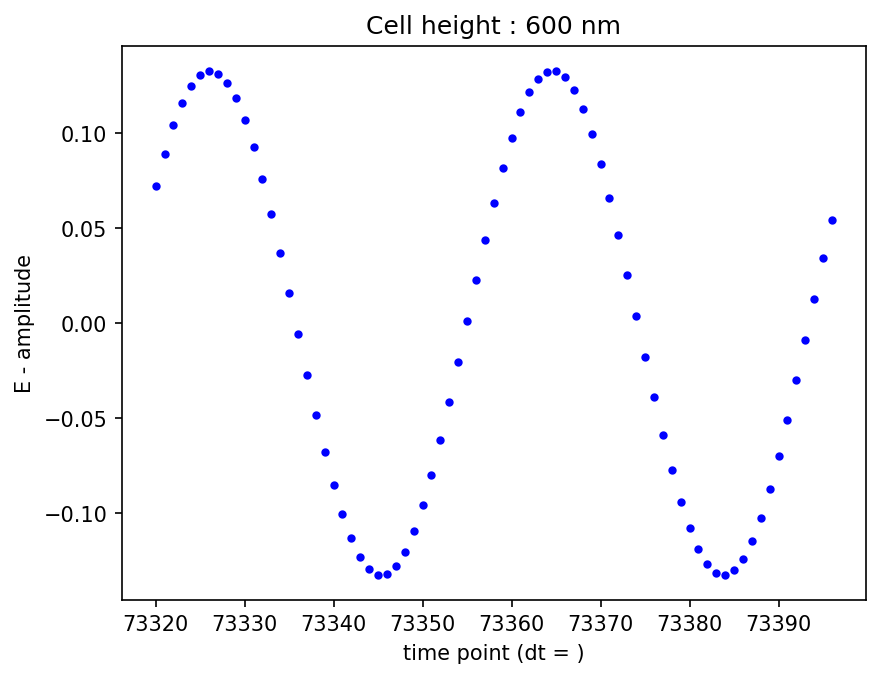

In [35]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        break

print('到達誤差範圍內的所需 meep time unit' ,  68326/ len(ez_data_list) * 500 , '\n')
dt_ = str(dt)
plt.figure(dpi = 150)
plt.title('Cell height : 600 nm')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)

# Phase for cell height = 600 nm

In [11]:
t_xx = (.532)
dt = (t_xx / 40)
t = 500

x_obs_cen = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_cen = 0

on time step 750000 (time=750), 0.00523591 s/step
Meep progress: 6.661000000000058/1250.0 = 0.5% done in 4.0s, 746.7s to go
on time step 756662 (time=756.662), 0.00060044 s/step
Meep progress: 13.311000000000035/1250.0 = 1.1% done in 8.0s, 743.3s to go
on time step 763313 (time=763.313), 0.000601478 s/step
Meep progress: 19.988000000000056/1250.0 = 1.6% done in 12.0s, 738.5s to go
on time step 769991 (time=769.991), 0.000598986 s/step
Meep progress: 26.62900000000002/1250.0 = 2.1% done in 16.0s, 735.1s to go
on time step 776633 (time=776.633), 0.000602252 s/step
Meep progress: 33.29200000000003/1250.0 = 2.7% done in 20.0s, 731.0s to go
on time step 783296 (time=783.296), 0.000600408 s/step
Meep progress: 39.90999999999997/1250.0 = 3.2% done in 24.0s, 727.7s to go
on time step 789916 (time=789.916), 0.000604249 s/step
Meep progress: 46.688999999999965/1250.0 = 3.7% done in 28.0s, 721.7s to go
on time step 796696 (time=796.696), 0.000590055 s/step
Meep progress: 53.39099999999996/1250.0 

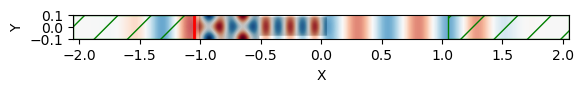

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
ez_data = []
###
def get_slice(sim):
    ez_data.append(sim.get_array( center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,sy) , component = mp.Ez , cmplx = True ))

###
sim.run(mp.at_every(dt , get_slice) , until = t)


plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

print(ez_data)

# Cell height 300nm

In [15]:
sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp * num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


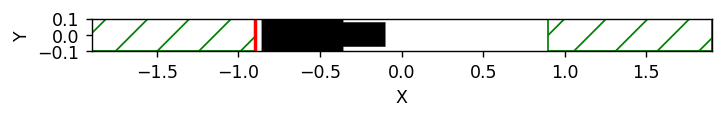

In [16]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()



In [17]:
t_xx = (.532)
dt = (t_xx / 40)
t = 1000

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy + gp/2
y_obs = y_obs_start
print(int((t_xx)/dt))

40


-----------
Initializing structure...
time for choose_chunkdivision = 0.000216007 s
Working in 2D dimensions.
Computational cell is 3.8 x 0.2 x 0 with resolution 500
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.143429 s
-----------
Meep progress: 7.172/1000.0 = 0.7% done in 4.0s, 553.8s to go
on time step 7172 (time=7.172), 0.000557786 s/step
Meep progress: 14.376/1000.0 = 1.4% done in 8.0s, 548.5s to go
on time step 14377 (time=14.377), 0.000555286 s/step
Meep progress: 21.578/1000.0 = 2.2% done in 12.0s, 544.2s to go
on time step 21581 (time=21.581), 0.00055526 s/step
Meep progress: 28.84/1000.0 = 2.9% done in 16.0s, 538.8s to go
on time step 2884

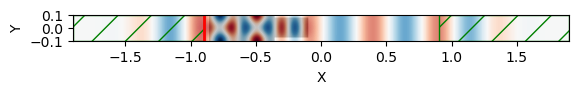

In [18]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)


plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

76923
0.14300850991871578
0.13231224604147576
41


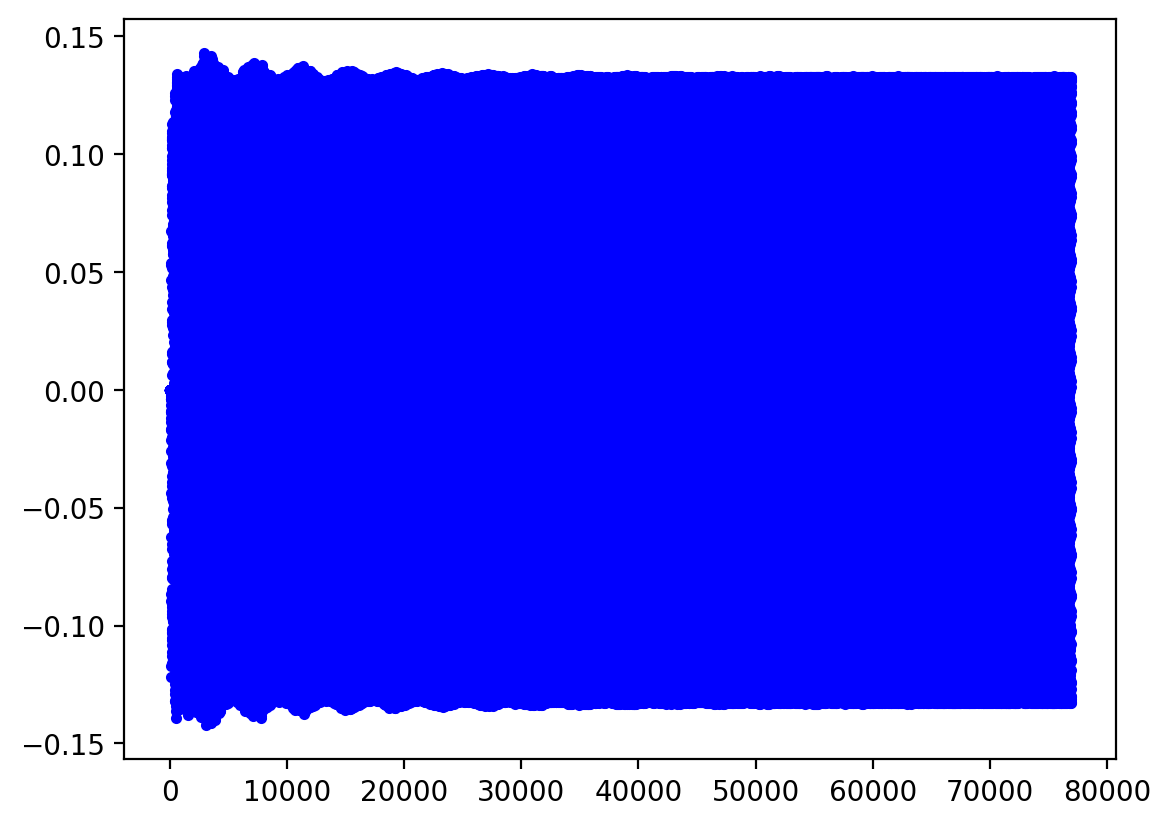

In [19]:
ez_data_list = np.array(ez_data_list)
ez_amplitude = np.abs(ez_data_list)
print(len(ez_amplitude))
print(max(ez_amplitude))
print(ez_amplitude[20000])
print(1 + int(round(t_xx/dt)))


plt.figure(dpi = 200)
for i in range( round(len(ez_amplitude) * 0 / t) , round(len(ez_amplitude) * t / t)):
    plt.plot(i , ez_data_list[i] , 'b.')

In [20]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


0.1325064283107711 --------one period 內最大振福
0.13250638803413434 -------one next_period 內最大振福
4.0276636775749e-08 -----振幅誤差
(array([68326]),) --- index1
(array([68365]),) --- index2
0.1325064283107711 	 0.13250638803413434 	 4.0276636775749e-08 	 (array([68326]),) 	 (array([68365]),) 


到達誤差範圍內的所需 meep time unit 444.3729443729444 

0.13261745014030607


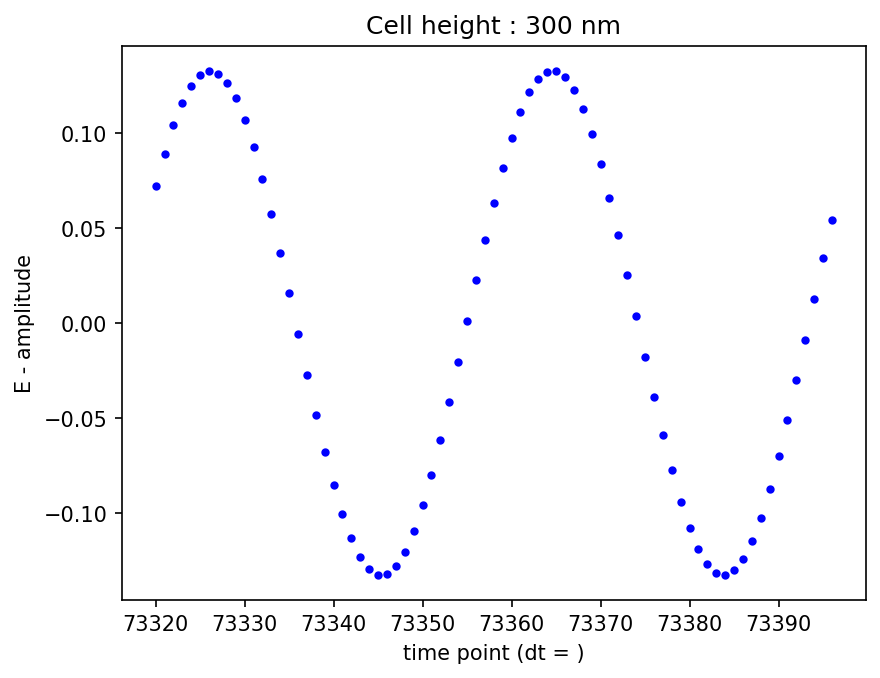

In [34]:
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        break

print('到達誤差範圍內的所需 meep time unit' ,  68365/ len(ez_data_list) * 500 , '\n')
dt_ = str(dt)
plt.figure(dpi = 150)
plt.title('Cell height : 300 nm')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)

In [21]:
# 儲存振福資訊的列表
ez_amplitude_list = [[] for _ in range(int(round(t/dt)))]

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy #+ gp/2
y_obs = y_obs_start

for i in range(int(round(t/dt))):
    for j in range(int(round(sy/0.002))):
        y_obs = y_obs_start + (j * 0.002)
        # 計算觀測點在陣列中的索引位置
        x_index = int(round(x_obs * sim.resolution))
        y_index = int(round(y_obs * sim.resolution))
        # 取得振幅資訊
        amplitude = np.abs(ez_data_list[i][0][x_index, y_index])
        # 將振幅資訊加入到對應時間步長的列表中
        ez_amplitude_list[i].append(amplitude)

    
for i in range(0, int((time_end - time_start) / dt)):
    print(ez_amplitude_list[i])
    
    

IndexError: list index out of range

In [33]:
for i in np.arange(0, time_end - time_start, dt):
    print(ez_amplitude_list[i])

[5.579162566050879e-09, 5.579162566050894e-09, 5.579162566050897e-09, 5.5791625660508835e-09, 5.57916256605089e-09, 5.579162566050901e-09, 5.579162566050874e-09, 5.579162566050857e-09, 5.579162566050842e-09, 5.5791625660508256e-09, 5.5791625660508214e-09, 5.579162566050828e-09, 5.5791625660508165e-09, 5.579162566050807e-09, 5.579162566050824e-09, 5.579162566050836e-09, 5.579162566050847e-09, 5.579162566050856e-09, 5.579162566050866e-09, 5.579162566050875e-09, 5.579162566050882e-09, 5.5791625660508595e-09, 5.57916256605084e-09, 5.579162566050829e-09, 5.5791625660508214e-09, 5.5791625660508355e-09, 5.579162566050856e-09, 5.579162566050882e-09, 5.579162566050892e-09, 5.579162566050895e-09, 5.579162566050885e-09, 5.579162566050852e-09, 5.579162566050835e-09, 5.579162566050808e-09, 5.579162566050766e-09, 5.579162566050753e-09, 5.5791625660507635e-09, 5.579162566050763e-09, 5.5791625660507735e-09, 5.579162566050808e-09, 5.579162566050837e-09, 5.579162566050846e-09, 5.579162566050848e-09, 5.5

In [17]:

# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01
y_obs_start = -0.5 * sy #+ gp/2 

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(num_cells):
    y_obs = y_obs_start + (j * gp)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs) * sim.resolution))
    y_index = int(round((y_obs) * sim.resolution))
    # 取得相位資訊
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

# 印出觀測點的相位資訊
'''
for j, phase in enumerate(phase_list):
    print(f"觀測點 {j+1} 的相位資訊: {phase}")'''
print(phase_list)

[2.9956288798286947, 0.0, -2.9956288798288315]


# Animation

In [6]:
sim.reset_meep()
f = plt.figure(dpi = 100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 70)
plt.close()

filename = "3 beta beta beta structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 8.58307e-05 s
Working in 2D dimensions.
Computational cell is 17.1 x 0.6 x 0 with resolution 50
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0242319 s
-----------


Meep: using complex fields.
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
Normalizing field data...
run 1 finished at t = 70.0 (7000 timesteps)
Generating MP4...
